In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

In [14]:
bank = pd.read_csv(r'/Users/ajrubel/Downloads/Customer-Churn-Records.csv')

In [16]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [20]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [22]:
bank.duplicated().sum()

0

In [24]:
bank.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [26]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Number of People that have churned vs have not

In [87]:
churn_counts = bank['Exited'].value_counts()
churn_percent = bank['Exited'].value_counts(normalize=True) * 100

churn_summary = pd.DataFrame({
    'Count': churn_counts,
    'Percent': churn_percent.round(2)
})

churn_summary

,Count,Percent
Exited,,
0,7962,79.62
1,2038,20.38


Customer Segments Most Likely to Churn

In [32]:
bank['Age Group'] = pd.cut(bank['Age'],bins=[17,30,40,50,60,100],labels=['18-30','31-40','41-50','51-60','61+'])

In [34]:
churn_ages = bank.groupby('Age Group')['Exited'].mean().reset_index()
churn_ages

/var/folders/pg/xvvldnsn3s7_mdhrg9vl7r040000gn/T/ipykernel_56848/684241691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_ages = bank.groupby('Age Group')['Exited'].mean().reset_index()


,Age Group,Exited
0,18-30,0.075203
1,31-40,0.121096
2,41-50,0.339655
3,51-60,0.562108
4,61+,0.247845


/var/folders/pg/xvvldnsn3s7_mdhrg9vl7r040000gn/T/ipykernel_56848/3108008973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Exited', data=churn_ages, palette='Blues')


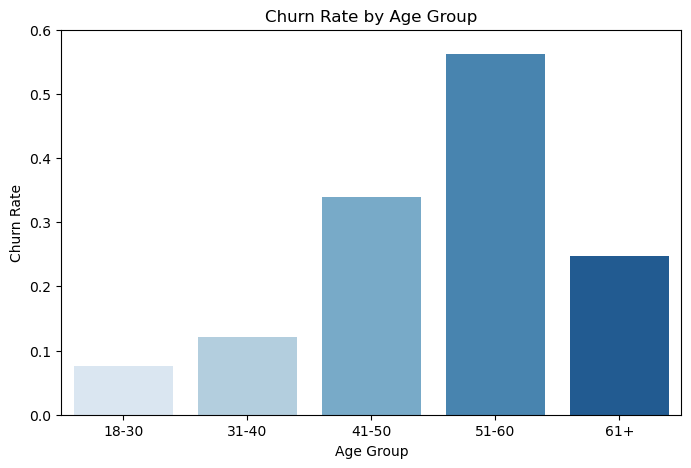

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age Group', y='Exited', data=churn_ages, palette='Blues')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.ylim(0, 0.6)
plt.show()

Calculate Churn Rate by number of Products

In [39]:
bank.groupby('NumOfProducts')['Exited'].mean()

NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64

In [41]:
product_churn = bank.groupby('NumOfProducts')['Exited'].agg(['mean', 'count']).reset_index()
product_churn.columns = ['NumOfProducts', 'ChurnRate', 'CustomerCount']
product_churn[product_churn['CustomerCount'] > 50]

,NumOfProducts,ChurnRate,CustomerCount
0,1,0.277144,5084
1,2,0.076035,4590
2,3,0.827068,266
3,4,1.000000,60


/var/folders/pg/xvvldnsn3s7_mdhrg9vl7r040000gn/T/ipykernel_56848/1625599453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data=churn_by_products, palette='Blues')


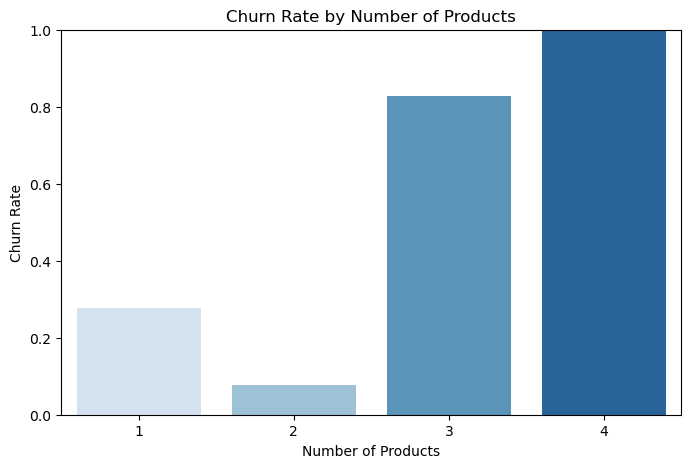

In [43]:
churn_by_products = bank.groupby('NumOfProducts')['Exited'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='NumOfProducts', y='Exited', data=churn_by_products, palette='Blues')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Calculate churn rate by customer activity status

In [46]:
bank.groupby('IsActiveMember')['Exited'].mean()

IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64

Customer Engagement Impact

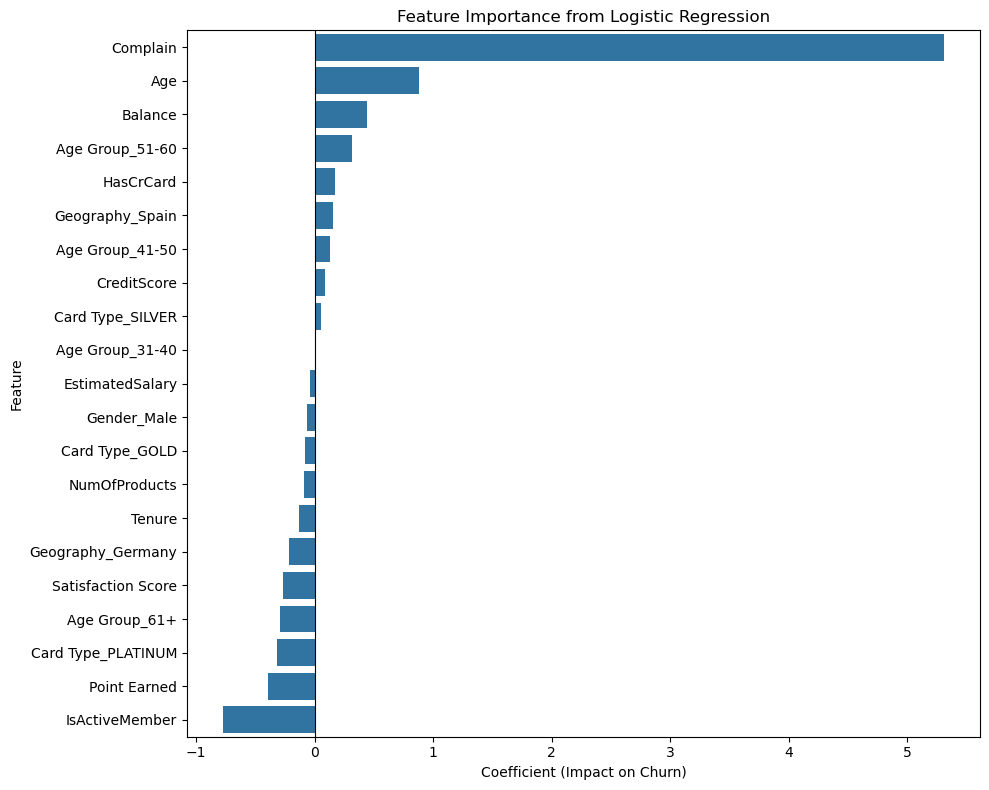

In [79]:
coef_bank = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_bank)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient (Impact on Churn)')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

Churn by Region

In [52]:
regional_churn = bank.groupby('Geography')['Exited'].mean().reset_index()
regional_churn

,Geography,Exited
0,France,0.161747
1,Germany,0.324432
2,Spain,0.166734


/var/folders/pg/xvvldnsn3s7_mdhrg9vl7r040000gn/T/ipykernel_56848/1044255594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Geography', y='Exited', data=regional_churn, palette='Oranges')


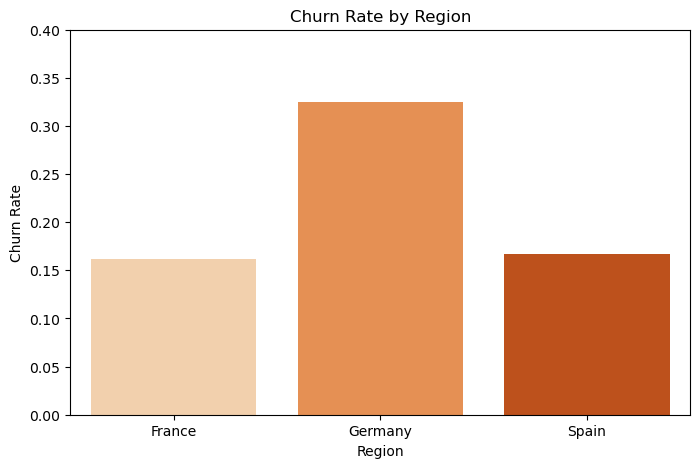

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x='Geography', y='Exited', data=regional_churn, palette='Oranges')
plt.title('Churn Rate by Region')
plt.ylabel('Churn Rate')
plt.xlabel('Region')
plt.ylim(0, 0.4)
plt.show()

Logistic Model

In [57]:
bank_encoded = pd.get_dummies(bank, drop_first=True)

X = bank_encoded.drop("Exited", axis=1)
y = bank_encoded["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
model = LogisticRegression(
    penalty='l2',
    C=1.0,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [63]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.6
y_pred = (y_proba > threshold).astype(int)

In [65]:
classification = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)

In [67]:
X_scaled_all = scaler.fit_transform(X)
cv_scores = cross_val_score(model, X_scaled_all, y, cv=5, scoring='roc_auc')

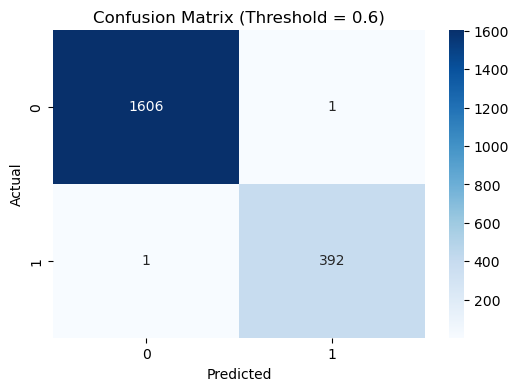

In [69]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Threshold = 0.6)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
report = classification_report(y_test, y_pred, output_dict=True)

key_metrics = {
    "Accuracy": round(accuracy_score(y_test, y_pred), 3),
    "ROC AUC": round(roc_auc_score(y_test, y_proba), 3),
    "Precision (Churn=1)": round(report["1"]["precision"], 3),
    "Recall (Churn=1)": round(report["1"]["recall"], 3),
    "F1 Score (Churn=1)": round(report["1"]["f1-score"], 3)
}

key_metrics

{'Accuracy': 0.999,
 'ROC AUC': 1.0,
 'Precision (Churn=1)': 0.997,
 'Recall (Churn=1)': 0.997,
 'F1 Score (Churn=1)': 0.997}

In [73]:
# 1. Create a dictionary for the new customer
new_customer = {
    'CreditScore': 650,
    'Age': 35,
    'Tenure': 5,
    'Balance': 75000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 60000,
    'Complain': 0,
    'Satisfaction Score': 4,
    'Point Earned': 450,
    'Gender_Male': 1,  # 1 = Male, 0 = Female
    'Geography_Germany': 0,
    'Geography_Spain': 1,
    'Card Type_GOLD': 1,
    'Card Type_PLATINUM': 0,
    'Card Type_SILVER': 0
}

In [75]:
new_customer_df = pd.DataFrame([new_customer])

missing_cols = set(X_train.columns) - set(new_customer_df.columns)
for col in missing_cols:
    new_customer_df[col] = 0  


new_customer_df = new_customer_df[X_train.columns]

In [77]:
new_proba = model.predict_proba(new_customer_df)[:, 1]

threshold = 0.6
new_prediction = (new_proba > threshold).astype(int)

print(f"Churn Probability: {round(new_proba[0]*100, 2)}%")
print("Prediction:", "Likely to Churn" if new_prediction[0] == 1 else "Likely to Stay")

Churn Probability: 100.0%
Prediction: Likely to Churn


/Users/ajrubel/Desktop/anaconda3/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
